In [88]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
pd.set_option('display.max_rows', None)

def calRatio_n(series,n):
    return series / guoZhai_scaled[str(n)+'Y']
def calSub_n(series,n):
    return series**(-1) - guoZhai_scaled[str(n)+'Y']
def scale(series):
    return (series- series.min())/(series.max() - series.min())

In [5]:
from WindPy import *
help(w.edb)

Help on function edb in module WindPy:

edb(codes, beginTime=None, endTime=None, options=None, *arga, **argb)
    edb获取



In [17]:
from WindPy import *
import pandas as pd
w.start()
String = "801011.SI,801012.SI,801013.SI,801014.SI,801015.SI,801016.SI,801017.SI,801018.SI,801021.SI,801022.SI,801023.SI,801024.SI,\
801032.SI,801033.SI,801034.SI,801035.SI,801036.SI,801037.SI,801041.SI,801051.SI,801053.SI,801054.SI,801055.SI,801072.SI,801073.SI,\
801074.SI,801075.SI,801076.SI,801081.SI,801082.SI,801083.SI,801084.SI,801085.SI,801092.SI,801093.SI,801094.SI,801101.SI,801102.SI,\
801111.SI,801112.SI,801123.SI,801124.SI,801131.SI,801132.SI,801141.SI,801142.SI,801143.SI,801144.SI,801151.SI,801152.SI,801153.SI,\
801154.SI,801155.SI,801156.SI,801161.SI,801162.SI,801163.SI,801164.SI,801171.SI,801172.SI,801173.SI,801174.SI,801175.SI,801176.SI,\
801177.SI,801178.SI,801181.SI,801182.SI,801191.SI,801192.SI,801193.SI,801194.SI,801202.SI,801203.SI,801204.SI,801205.SI,801211.SI,\
801212.SI,801213.SI,801214.SI,801215.SI,801222.SI,801223.SI,801231.SI,801711.SI,801712.SI,801713.SI,801721.SI,801722.SI,801723.SI,\
801724.SI,801725.SI,801731.SI,801732.SI,801733.SI,801734.SI,801741.SI,801742.SI,801743.SI,801744.SI,801751.SI,801752.SI,801761.SI,801881.SI"
Return = w.wsd(String, "pct_chg", "2015-01-01", "2021-12-02", usedf=True)
Dividend = w.wsd(String, "dividendyield2", "2015-01-01", "2021-12-02", usedf=True)
Bond = w.edb("S0059747", "2015-01-01", "2021-12-02","Fill=Previous",usedf=True)



In [18]:
Return

(-40522017,
                       OUTMESSAGE
 0  CWSDService:: quota exceeded.)

In [93]:
sub_1 = guXi.apply(calSub_n,args=(1,))

In [94]:
duizhao = pd.read_excel('对照表.xlsx')
duizhao.set_index('代码',inplace=True)

# Tirth

<AxesSubplot:>

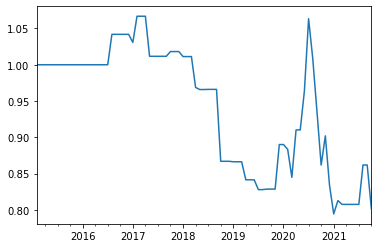

In [96]:
from scipy.stats import rankdata
Rank = sub_1.rolling(sub_1.shape[0],min_periods=12).apply(lambda x:rankdata(x)[-1]/len(x))
# Rank = guXi.rolling(guXi.shape[0],min_periods=12).apply(lambda x:rankdata(x)[-1]/len(x))

Chicang = pd.Series()
Return = pd.Series()
for i,date in enumerate(guoZhai.index[:-1]):
    Chicang[date] = Rank.loc[date,:][Rank.loc[date,:] > 0.9].index
    next_date = Rank.index[i+1]
    if len(Chicang[date]):
        Return[next_date] = shouYi.loc[next_date,Chicang[date]].mean()
    else:
        Return[next_date] = 0
    
net_value = (Return / 100 + 1).cumprod()
net_value.plot()

    
    
    
    
#     next_date = guoZhai.index[i+1]
#     chicangName[next_date] = duizhao.loc[port1,'简称'].tolist() 
#     chicangName_withProfit[next_date] = dict(shouYi.loc[next_date,port1].round(2)) 


In [47]:
Chicang['2015'][-1]

Index(['801211.SI'], dtype='object')

In [48]:
duizhao.loc[Chicang['2015'][-1],'简称']

801211.SI    餐饮Ⅱ(申万)
Name: 简称, dtype: object

In [49]:
shouYi.loc['2016-01',Chicang['2015'][-1]]

,801211.SI
日期,
2016-01-31,-28.447229


<AxesSubplot:xlabel='日期'>

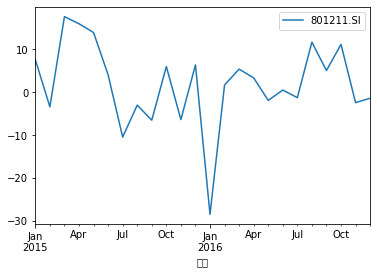

In [51]:
shouYi.loc['2015':'2016',Chicang['2015'][-1]].plot()

<AxesSubplot:xlabel='日期'>

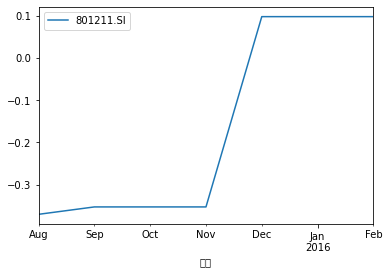

In [56]:
guXi.loc['2015-08':'2016-02',Chicang['2015'][-1]].plot()

<AxesSubplot:xlabel='频率'>

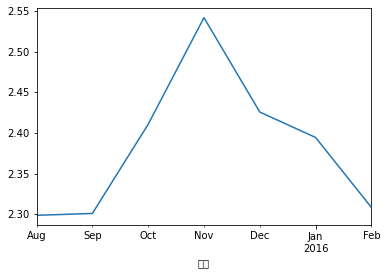

In [57]:
guoZhai.loc['2015-08':'2016-02','1Y'].plot()

<AxesSubplot:xlabel='日期'>

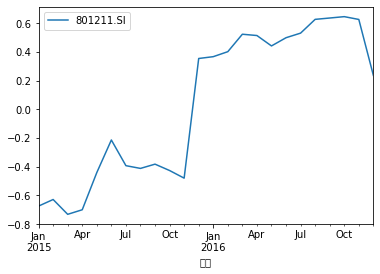

In [53]:
sub_1.loc['2015':'2016',Chicang['2015'][-1]].plot()

In [42]:
Return['2016']

2016-01-31   -28.447229
2016-02-29     1.671282
2016-03-31    10.462750
2016-04-30    -1.725267
2016-05-31     0.000000
2016-06-30     0.000000
2016-07-31     0.000000
2016-08-31     6.519965
2016-09-30    -0.248970
2016-10-31     4.771321
2016-11-30     5.600805
2016-12-31     0.000000
dtype: float64

# Second

In [ ]:
lower = sub_1.cummin().apply(lambda x: x < x.shift(1))
higher = sub_1.cummax().apply(lambda x: x > x.shift(1))
position1 = lower.apply(lambda x: x[x].index)
position2 = higher.apply(lambda x: x[x].index)
chicang1 = pd.Series()
chicang2 = pd.Series()
profit = pd.Series()
for index in sub_1.index:
    chicang1[index] = []
    chicang2[index] = []
    profit[index] = 0

for index in position1.index:
    where = position1[index]
    for date in where:
        chicang1[date].append(index)
        
for index in position2.index:
    where = position2[index]
    for date in where:
        chicang2[date].append(index)
        
for i,date in enumerate(sub_1.index[1:]):
    pos1 = chicang1[sub_1.index[i]] #long
    pos2 = chicang2[sub_1.index[i]] #short
    if not (len(pos1)):
        profit[date] = 0
    if len(pos1):
        profit[date] +=  shouYi.loc[date,pos1].mean()
#     if len(pos2):
#         profit[date] +=  shouYi.loc[date,pos2].mean()
#     if not (len(pos2)):
#         profit[date] = 0
#     else:
#         profit[date] +=  shouYi.loc[date,pos2].mean()
   
(profit/100+1).cumprod().plot()

In [98]:
lower.loc['2015-09':'2016-01',a]

,801020.SI,801040.SI,801110.SI,801740.SI
频率,,,,
2015-09-30,False,False,False,False
2015-10-31,True,False,False,False
2015-11-30,True,False,True,True
2015-12-31,True,True,True,True
2016-01-31,False,False,False,False


In [125]:
a = chicang['2015-12-31']
# shouYi.loc['2016-01-31',a]
display(sub_1.loc['2015-11-30':'2015-12-31',a])


,801020.SI,801040.SI,801110.SI,801740.SI
频率,,,,
2015-11-30,-0.233424,-0.245940,-0.340978,-0.202700
2015-12-31,-0.300652,-0.450928,-0.379794,-0.461938


In [8]:
a = sub_1.cummin()
n = 10 
df1 = a[a.columns[n]]
df2 = shouYi[a.columns[n]]
pd.concat([df1,df2],axis=1)

,801150.SI,801150.SI
频率,,
2015-01-31,0.032048,7.501543
2015-02-28,0.032048,5.770450
2015-03-31,0.032048,19.163617
2015-04-30,0.032048,16.998835
2015-05-31,0.032048,19.881582
2015-06-30,0.032048,-11.868538
2015-07-31,0.032048,-11.877507
2015-08-31,0.032048,-12.701089
2015-09-30,0.032048,-2.953274


In [208]:
guXi_rank = guXi.rolling(guXi.shape[0],min_periods=6).apply(lambda x:rankdata(x)[-1]/len(x))
guXi_rank

,801010.SI,801020.SI,801030.SI,801040.SI,801050.SI,801080.SI,801110.SI,801120.SI,801130.SI,801140.SI,...,801720.SI,801730.SI,801740.SI,801750.SI,801760.SI,801770.SI,801780.SI,801790.SI,801880.SI,801890.SI
频率,,,,,,,,,,,,,,,,,,,,,
2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-30,0.666667,0.166667,0.666667,0.166667,1.000000,0.666667,0.333333,0.166667,0.666667,0.833333,...,0.166667,0.333333,0.166667,0.333333,0.666667,0.666667,1.000000,1.000000,0.166667,0.166667
2015-07-31,0.571429,0.142857,0.714286,0.214286,0.857143,0.571429,0.142857,0.142857,1.000000,0.857143,...,0.142857,0.285714,0.142857,0.142857,0.142857,0.285714,0.428571,0.857143,0.142857,0.285714
2015-08-31,0.500000,0.187500,0.625000,0.125000,0.750000,0.500000,0.125000,0.125000,0.750000,0.812500,...,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.437500,0.812500,0.125000,0.125000
2015-09-30,0.222222,0.111111,0.111111,0.111111,0.111111,0.444444,0.111111,0.333333,0.111111,1.000000,...,0.333333,1.000000,0.111111,0.111111,0.777778,0.111111,1.000000,0.888889,0.222222,0.111111


In [250]:
def LLT(closePrice,D):
    cp = closePrice.copy()
    temp = closePrice.copy()
    a = 2.0/(D+1.0)
    for i in range(2,len(temp)):
        temp[i] = (a-a**2/4)*cp[i]+(a**2/2)*cp[i-1]-(a-3*a**2/4)*cp[i-2]+2*(1-a)*temp[i-1]-(1-a)**2*temp[i-2]
    return temp

DaPan = pd.read_excel('沪深300.xlsx')
DaPan.set_index('Unnamed: 0',inplace=True)

portfolio_all = pd.DataFrame(index=DaPan.index)
LLT_line = LLT(DaPan['000300.SH'],2)
LLT_line_diff = LLT_line.diff()
portfolio = [1,1]
PL = [0,0]
for i in range(2,len(LLT_line)):
    if LLT_line_diff[i-1] > 0:
        portfolio.append(1)
    else:
        portfolio.append(0)
for i in range(2,len(LLT_line)):
    portfo = portfolio[i]
    PL.append(portfo*DaPan['000300.SH'][i])
    
PL_series = pd.DataFrame(PL,columns=['000300.SH择时'],index=DaPan.index)
portfolio_all['000300.SH择时'] = portfolio

<AxesSubplot:xlabel='Unnamed: 0'>

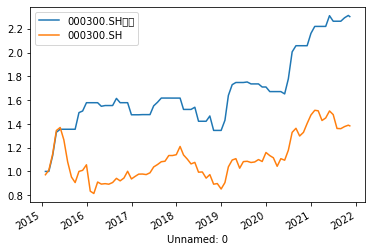

In [251]:
ax = (PL_series/100+1).cumprod().plot()
(DaPan/100+1).cumprod().plot(ax=ax)

<AxesSubplot:xlabel='频率'>

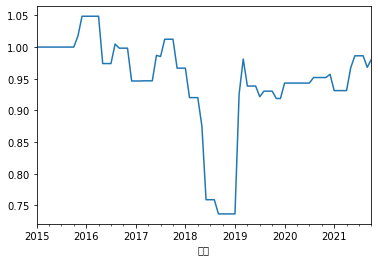

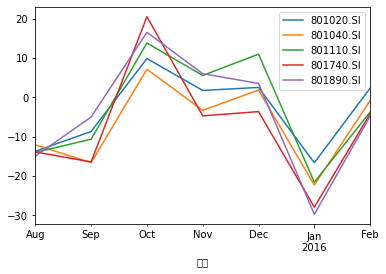

In [266]:
from scipy.stats import rankdata
sub_1_roll = sub_1.rolling(2,min_periods=1).apply(lambda x:x.mean())
Rank = sub_1_roll.rolling(sub_1.shape[0],min_periods=1).apply(lambda x:rankdata(x)[-1]/len(x))

guXi_rank = guXi.rolling(guXi.shape[0],min_periods=1).apply(lambda x:rankdata(x)[-1]/len(x))

chiCang = pd.Series()
profit = pd.Series(index=guoZhai.index)

for i in profit.index:
    profit[i] = 0

chicangName = pd.Series()
chicangName_withProfit = pd.Series()

for i,date in enumerate(guoZhai.index[:-1]):
    port1 = []
    for industry in guXi.columns:
        if Rank.loc[date,industry] < 0.2:
            port1.append(industry)
    chiCang[date] = port1
#     next_date = guoZhai.index[i+1]
#     chicangName[next_date] = duizhao.loc[port1,'简称'].tolist() 
#     chicangName_withProfit[next_date] = dict(shouYi.loc[next_date,port1].round(2)) 


            
for date in guoZhai.index[2:-1]:
    place = guoZhai.index.get_loc(date)
    next_date = guoZhai.index[place+1]
    len1 = len(chiCang[date]) 
    if (not len1):
        profit[next_date] = 0
    if len1:
        if portfolio_all.loc[next_date,'000300.SH择时'] == 1:
            profit[next_date] = shouYi.loc[next_date,chiCang[date]].mean()

jingzhi = (profit / 100 + 1).cumprod()
jingzhi.plot()
shouYi.loc['2015-08':'2016-2',chiCang['2015-12-31']].plot()
# display(pd.concat([chiCang,profit],axis=1))


In [263]:
display(pd.concat([chiCang,profit],axis=1))

,0,1
2015-01-31,[],0.000000
2015-02-28,[],0.000000
2015-03-31,[],0.000000
2015-04-30,[],0.000000
2015-05-31,[],0.000000
2015-06-30,[],0.000000
2015-07-31,[],0.000000
2015-08-31,[],0.000000
2015-09-30,[],0.000000
2015-10-31,[],0.000000


In [264]:
portfolio_all

,000300.SH择时
Unnamed: 0,
2015-01-31,1
2015-02-28,1
2015-03-31,1
2015-04-30,1
2015-05-31,1
2015-06-30,0
2015-07-31,0
2015-08-31,0
2015-09-30,0


In [227]:
shouYi.loc['2015-08':'2016',chiCang['2015-12-31']]

,801020.SI,801040.SI,801110.SI,801740.SI
频率,,,,
2015-08-31,-13.734505,-12.101020,-14.025786,-13.912447
2015-09-30,-8.698778,-16.639221,-10.661462,-16.449476
2015-10-31,9.839748,7.134798,13.820130,20.512925
2015-11-30,1.733434,-3.323175,5.552888,-4.734971
2015-12-31,2.512714,1.827637,10.962835,-3.644353
2016-01-31,-16.657637,-22.320632,-21.611813,-27.955546
2016-02-29,2.328935,-0.845988,-3.750520,-4.178861
2016-03-31,4.445448,6.977925,12.551631,18.597281
2016-04-30,2.809500,1.312577,0.501517,-6.970425


<AxesSubplot:xlabel='频率'>

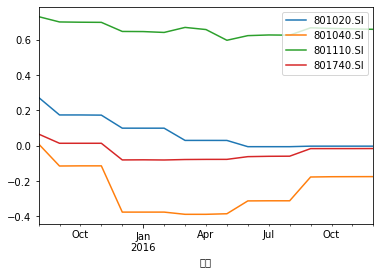

In [225]:
guXi.loc['2015-08':'2016',chiCang['2015-12-31']].plot()

<AxesSubplot:xlabel='频率'>

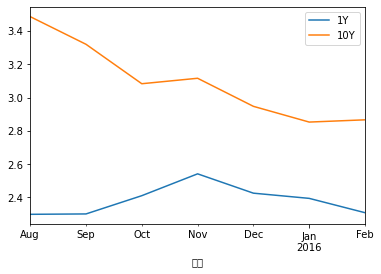

In [226]:
guoZhai['2015-08':'2016-2'].plot()

<AxesSubplot:xlabel='频率'>

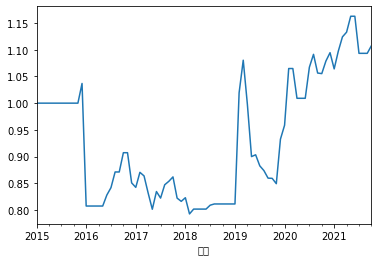

In [136]:
# guozhairank = (guoZhai['1Y'].rank(ascending=False)/len(guoZhai['1Y']))
# intervals = [0,1,2,3,4,5]
# cols = guXi.columns
# stats = pd.DataFrame(columns=cols,index=intervals)
# for i in intervals:
#     for j in cols:
#         stats[j][i] = [0,0]
# stats
# for i in stats.columns:
#     for date in guoZhai.index:
#         m = round(guozhairank[date] / 0.2)
#         list1 = stats.loc[m,i]
#         list2 = [shouYi.loc[date,i],1]
#         stats.loc[m,i] = list(map(lambda x :x[0]+x[1] ,zip(list1,list2)))

# average_profit = pd.DataFrame(index=stats.index,columns=stats.columns)
# for index in average_profit.index:
#     for col in average_profit.columns:
#         average_profit.loc[index,col] = stats.loc[index,col][0] / stats.loc[index,col][1]
        
# Final_intervals = pd.Series()
# for industry in average_profit.columns:
#     series = average_profit[industry]
#     Final_intervals[industry] = series.sort_values(ascending=False).index[0:3].to_list()

# chiCang = pd.Series()
# profit = pd.Series()

# for date in guoZhai['1Y'].index:
#     guozhaidate = guozhairank[date]
#     port = []
#     for industry in guXi.columns:
#         if round(guozhaidate / 0.2) in Final_intervals[industry]:
#             port.append(industry)
#     chiCang[date] = port

# for date in guoZhai['1Y'].index[:-1]:
#     place = guoZhai['1Y'].index.get_loc(date)
#     if len(chiCang[date]) == 0:
#         profit[guoZhai['1Y'].index[place+1]] = 0
#     else:
#         profit[guoZhai['1Y'].index[place+1]] = (shouYi.loc[guoZhai['1Y'].index[place+1],chiCang[date]]).mean()



<AxesSubplot:xlabel='频率'>

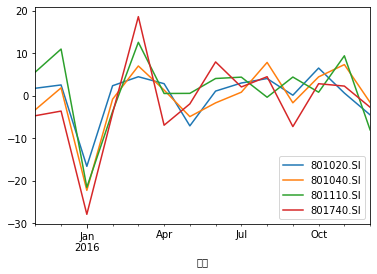

In [145]:
shouYi.loc['2015-11':'2016',chiCang['2015-12-31']].plot()

In [137]:
pd.concat([chiCang,profit],axis=1)

,0,1
2015-01-31,[],0.000000
2015-02-28,[],0.000000
2015-03-31,[],0.000000
2015-04-30,[],0.000000
2015-05-31,[],0.000000
2015-06-30,[],0.000000
2015-07-31,[],0.000000
2015-08-31,[],0.000000
2015-09-30,[],0.000000
2015-10-31,[],0.000000


<AxesSubplot:xlabel='频率'>

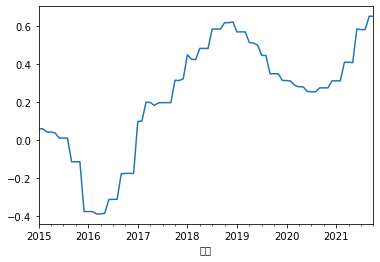

In [212]:
guXi[guXi.columns[3]].plot()

In [321]:
temp = jingzhi['2016':'2018']
(temp[-1] / temp[0])**(1/3)-1

-0.09196005376505001